# Coorelations of the database 

Correlation matrices for the data set 


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

#print all output in a cell 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [74]:
columns_solar = ['F10', 'F81',
           'S10', 'S81c', 'M10', 'M81c', 'Y10', 'Y81c', 
           '400kmDensity']  
columns_fism = ['225', '600', '1300', '2500', '5100', '11250',
           '18950', '25700', '30500', '43000', '59500', '72400', '85550', '94400',
           '98100', '100700', '103850', '113000','400kmDensity']
columns_swgeo = ['Bx_GSEGSM','By_GSM', 'Bz_GSM', 
           'Vsw', 'Vx_GSE', 'Vy_GSE', 'Vz_GSE', 'Prho', 'Tp',
           'dynP', 'Esw', 'AE', 'AL', 'AU', 'SYM_H index',
           'storm', 'storm phase','400kmDensity']  

col = columns_swgeo

In [10]:
fn = 'D:\\data\\SatDensities\\satdrag_database_grace_B.hdf5'
df = pd.read_hdf(fn)

In [11]:
# storm/quiet data 
st_t = (df['storm']>0.95) & (df['storm']<1.05) # storm times
qt_t = (df['storm']<0) # quiet times
mn_p = (df['storm phase']>0.95) & (df['storm phase']<1.05) # main phase
rc_p = (df['storm phase']>1.95) & (df['storm phase']<2.05) # recovery phase


In [52]:
qt_t.value_counts()
st_t.value_counts()

False    570564
True     472573
Name: storm, dtype: int64

True     570564
False    472573
Name: storm, dtype: int64

In [75]:
cor_plot = pd.DataFrame()
cor_mat = df[col].dropna().corr()
cor_plot['All'] = df[col].dropna().corr()['400kmDensity']
cor_plot['Quiet'] = df[qt_t][col].dropna().corr()['400kmDensity']
cor_plot['Storm'] = df[st_t][col].dropna().corr()['400kmDensity']
cor_plot['Main'] = df[mn_p][col].dropna().corr()['400kmDensity']
cor_plot['Recovery'] = df[rc_p][col].dropna().corr()['400kmDensity']
try:
    cor_plot['Balance']= pd.concat([df[st_t][col].dropna().sample(100000),df[qt_t][col].dropna().sample(100000)]).corr()['400kmDensity']
except:
    cor_plot['Balance']= pd.concat([df[st_t][col].dropna().sample(1000),df[qt_t][col].dropna().sample(1000)]).corr()['400kmDensity']

<AxesSubplot: >

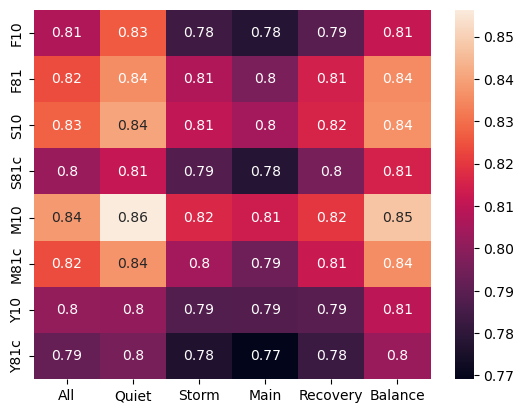

In [76]:
sns.heatmap(cor_plot[0:-1],annot=True)
plt.show()

In [ ]:
cor_plot = pd.DataFrame()
cor_mat = df[col].dropna().corr()
cor_plot['All'] = df[col].dropna().corr()['400kmDensity']
cor_plot['Storm'] = df[st_t,col].dropna().corr()['400kmDensity']

InvalidIndexError: (0           True
1           True
2           True
3           True
4           True
           ...  
1043132    False
1043133    False
1043134    False
1043135    False
1043136    False
Name: storm, Length: 1043137, dtype: bool, ['225', '600', '1300', '2500', '5100', '11250', '18950', '25700', '30500', '43000', '59500', '72400', '85550', '94400', '98100', '100700', '103850', '113000', '400kmDensity'])

In [ ]:
cor_plot = pd.DataFrame()
cor_mat = df[col].dropna().corr()
cor_plot['All'] = df[col].dropna().corr()['400kmDensity']
cor_plot['Storm'] = df[st_t,col].dropna().corr()['400kmDensity']

InvalidIndexError: (0           True
1           True
2           True
3           True
4           True
           ...  
1043132    False
1043133    False
1043134    False
1043135    False
1043136    False
Name: storm, Length: 1043137, dtype: bool, ['225', '600', '1300', '2500', '5100', '11250', '18950', '25700', '30500', '43000', '59500', '72400', '85550', '94400', '98100', '100700', '103850', '113000', '400kmDensity'])

In [21]:
sns.heatmap(cor_mat[0,'400kmDensity'])
plt.show()

InvalidIndexError: (slice(None, None, None), '400kmDensity')

In [19]:
cor_mat['400kmDensity']

225             0.062388
600             0.104403
1300            0.673246
2500            0.761733
5100           -0.001538
11250          -0.004094
18950          -0.000313
25700          -0.000071
30500           0.001513
43000           0.000120
59500           0.001012
72400          -0.000634
85550          -0.004544
94400          -0.004703
98100          -0.005072
100700          0.000260
103850          0.001015
113000          0.016662
400kmDensity    1.000000
Name: 400kmDensity, dtype: float64